### Setting up the environment

In [1]:
# Import necessary  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
sns.set_context("notebook", font_scale=1.2)

# Pandas display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# For reproducibility
np.random.seed(42)

### Loading the data

In [2]:
data_dir = '../data/raw/'

# Load employee data
employees_df = pd.read_csv(f'{data_dir}employees.csv', parse_dates=['HireDate', 'ExitDate'])

# Load survey data
surveys_df = pd.read_csv(f'{data_dir}surveys.csv', parse_dates=['SurveyDate'])

# Load performance data
performance_df = pd.read_csv(f'{data_dir}performance.csv')

# Load promotion history
promotions_df = pd.read_csv(f'{data_dir}promotions.csv', parse_dates=['PromotionDate'])

# Load training data
training_df = pd.read_csv(f'{data_dir}training.csv', parse_dates=['CompletionDate'])

# Load exit interview data
exit_interviews_df = pd.read_csv(f'{data_dir}exit_interviews.csv', parse_dates=['ExitDate', 'InterviewDate'])

# Load recruitment cost data
recruitment_costs_df = pd.read_csv(f'{data_dir}recruitment_costs.csv')

### Initial data overview

In [3]:
# Employee data overview
print(f"Employee data shape: {employees_df.shape}")
employees_df.head()

Employee data shape: (3892, 25)


,EmployeeID,FirstName,LastName,Age,Gender,OfficeLocation,DistanceFromHome,Department,JobRole,JobLevel,Education,FieldOfStudy,HireDate,YearsAtCompany,YearsSinceLastPromotion,JobSatisfaction,EnvironmentSatisfaction,WorkLifeBalance,PerformanceRating,Overtime,MonthlyIncome,AnnualIncome,TrainingTimesLastYear,Attrition,ExitDate
0,10001,Tuti,Hidayat,25,Male,Jakarta,12.41,Sales,Sales Representative,Entry Level,Diploma,Economics,2025-01-14 07:38:40.440343,0.15,1,3.8,4,5,3,False,3.91,50.85,71,True,2025-01-26 07:38:40.440343
1,10002,Yanto,Purnama,46,Male,Jakarta,8.59,Sales,Branch Sales Supervisor,Senior,Bachelor's Degree,Other,2023-01-24 07:38:40.440343,2.13,2,1.5,3,4,3,False,43.28,562.70,17,False,NaT
2,10003,Farida,Utama,39,Female,Surabaya,8.84,Customer Service,Customer Service Representative,Entry Level,Bachelor's Degree,Business Administration,2023-10-25 07:38:40.440343,1.38,0,3.0,3,4,3,False,5.33,69.24,22,False,NaT
3,10004,Dedi,Purnama,54,Male,Depok,15.93,Operations,Operations Supervisor,Senior,High School,High School,2022-01-15 07:38:40.440343,3.15,3,3.2,4,3,4,False,55.51,721.63,47,False,NaT
4,10005,Edi,Habibie,24,Female,Palembang,15.72,Operations,Regional Operations Director,Director,Bachelor's Degree,Business Administration,2024-07-18 07:38:40.440343,0.64,1,3.8,4,3,4,False,82.15,1068.00,10,False,NaT


In [4]:
# Basic employee statistics
print("Basic statistics:")
print(f"Total employees: {len(employees_df)}")
print(f"Current employees: {len(employees_df[~employees_df['Attrition']])}")
print(f"Former employees: {len(employees_df[employees_df['Attrition']])}")
print(f"Attrition rate: {len(employees_df[employees_df['Attrition']]) / len(employees_df):.2%}")

# Department distribution
dept_counts = employees_df['Department'].value_counts()
print("\nEmployee count by department:")
for dept, count in dept_counts.items():
    print(f"  - {dept}: {count} ({count/len(employees_df):.1%})")

Basic statistics:
Total employees: 3892
Current employees: 3000
Former employees: 892
Attrition rate: 22.92%

Employee count by department:
  - Sales: 945 (24.3%)
  - Collections: 738 (19.0%)
  - Operations: 602 (15.5%)
  - Customer Service: 412 (10.6%)
  - Risk Management: 341 (8.8%)
  - Finance: 333 (8.6%)
  - IT: 224 (5.8%)
  - HR: 146 (3.8%)
  - Legal: 82 (2.1%)
  - Executive: 69 (1.8%)


### Attrition analysis

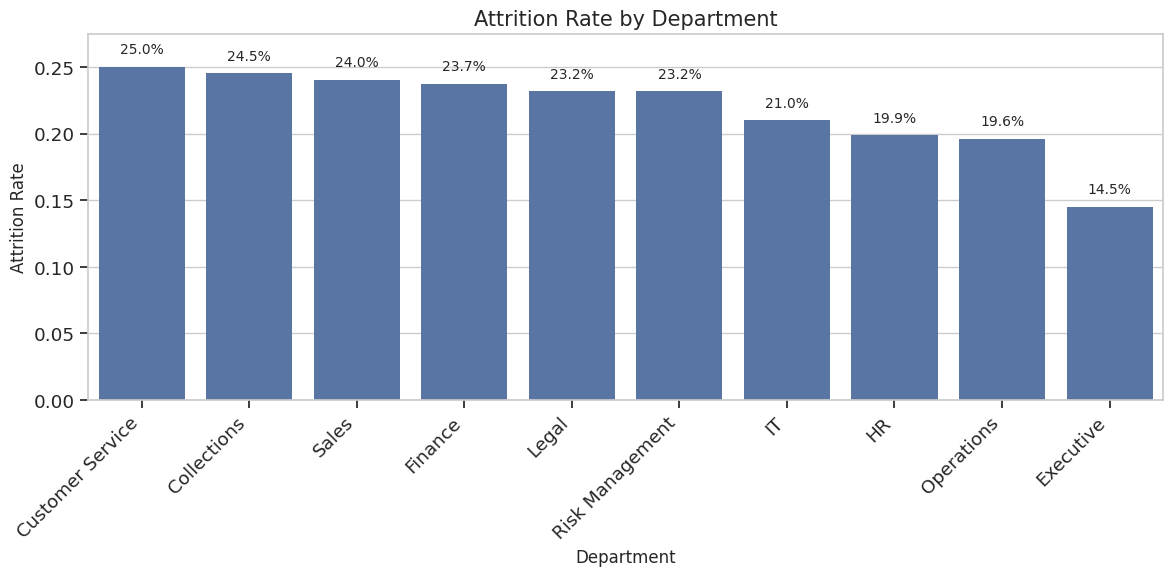

In [5]:
# Calculate attrition by department
dept_attrition = employees_df.groupby('Department')['Attrition'].mean().sort_values(ascending=False)

# Plot attrition by department
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=dept_attrition.index, y=dept_attrition.values)
plt.title('Attrition Rate by Department', fontsize=15)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(dept_attrition.values) * 1.1)

# Add value labels
for i, v in enumerate(dept_attrition.values):
    ax.text(i, v + 0.01, f'{v:.1%}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

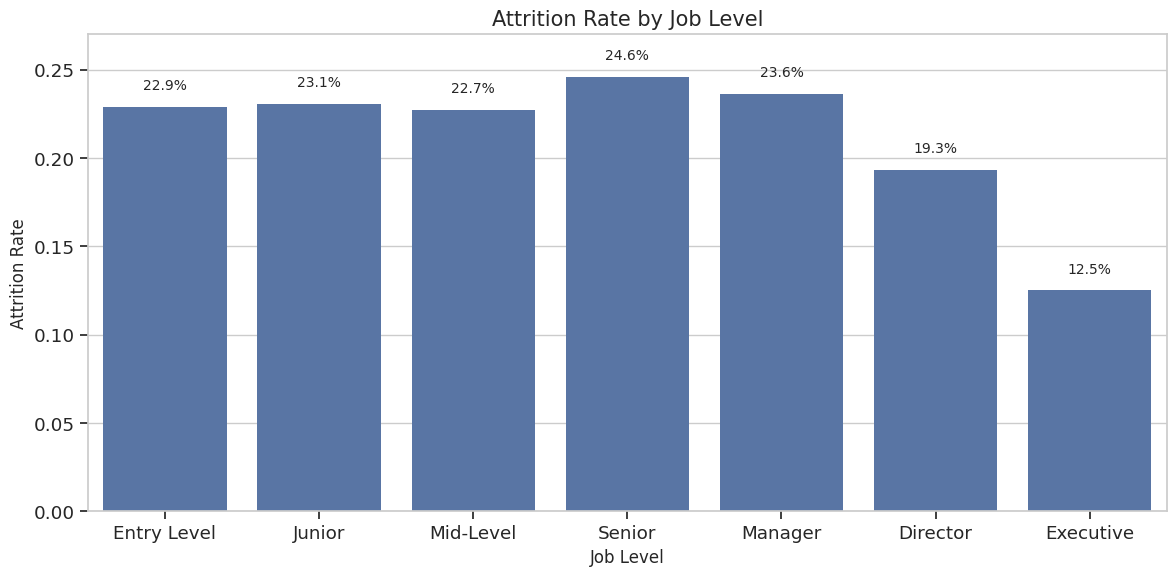

In [6]:
# Attrition by job level
level_attrition = employees_df.groupby('JobLevel')['Attrition'].mean().reindex(
    ['Entry Level', 'Junior', 'Mid-Level', 'Senior', 'Manager', 'Director', 'Executive']
)

# Plot attrition by job level
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=level_attrition.index, y=level_attrition.values)
plt.title('Attrition Rate by Job Level', fontsize=15)
plt.xlabel('Job Level', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.ylim(0, max(level_attrition.values) * 1.1)

# Add value labels
for i, v in enumerate(level_attrition.values):
    ax.text(i, v + 0.01, f'{v:.1%}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

/tmp/ipykernel_2635/2020773915.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_attrition = employees_df.groupby('TenureBin')['Attrition'].mean()


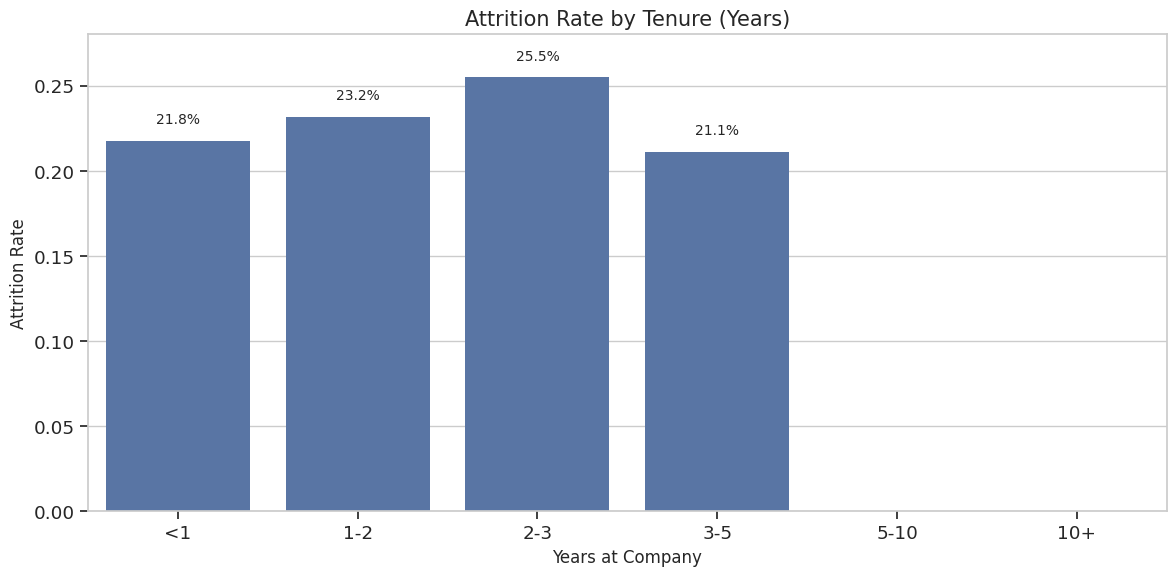

In [7]:
# Attrition by tenure
employees_df['TenureBin'] = pd.cut(employees_df['YearsAtCompany'], 
                                  bins=[0, 1, 2, 3, 5, 10, 100],
                                  labels=['<1', '1-2', '2-3', '3-5', '5-10', '10+'])

tenure_attrition = employees_df.groupby('TenureBin')['Attrition'].mean()

# Plot attrition by tenure
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=tenure_attrition.index, y=tenure_attrition.values)
plt.title('Attrition Rate by Tenure (Years)', fontsize=15)
plt.xlabel('Years at Company', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.ylim(0, max(tenure_attrition.values) * 1.1)

# Add value labels
for i, v in enumerate(tenure_attrition.values):
    ax.text(i, v + 0.01, f'{v:.1%}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

### Exit interview analysis

/tmp/ipykernel_2635/2095126269.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=exit_reasons.values, y=exit_reasons.index, palette='viridis')


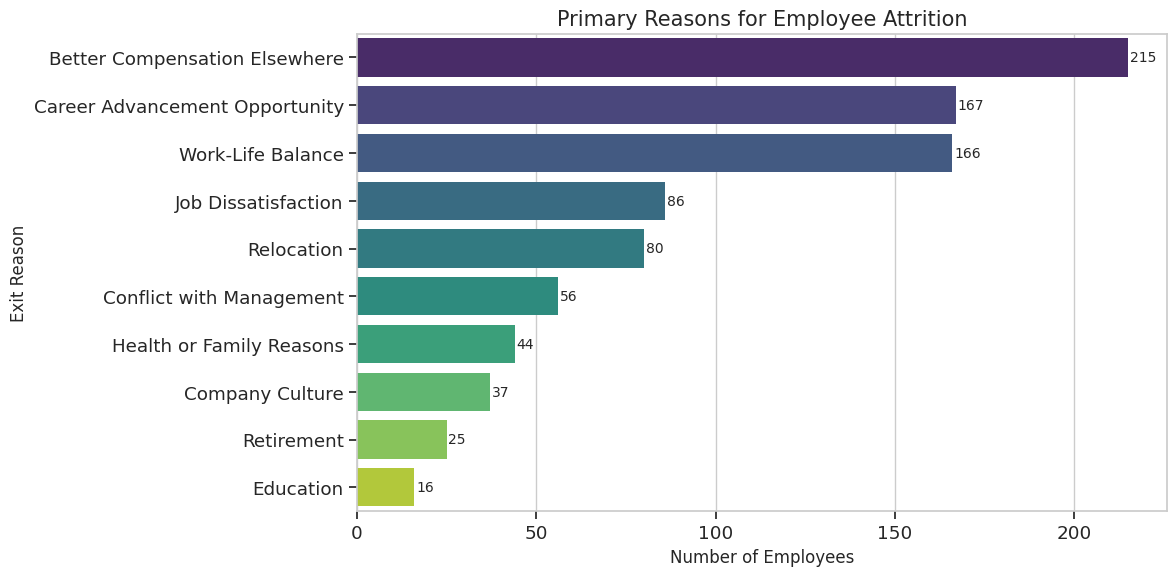

In [8]:
# Top reasons for leaving
exit_reasons = exit_interviews_df['PrimaryExitReason'].value_counts()

# Plot exit reasons
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=exit_reasons.values, y=exit_reasons.index, palette='viridis')
plt.title('Primary Reasons for Employee Attrition', fontsize=15)
plt.xlabel('Number of Employees', fontsize=12)
plt.ylabel('Exit Reason', fontsize=12)

# Add value labels
for i, v in enumerate(exit_reasons.values):
    ax.text(v + 0.5, i, str(v), va='center', fontsize=10)

plt.tight_layout()
plt.show()

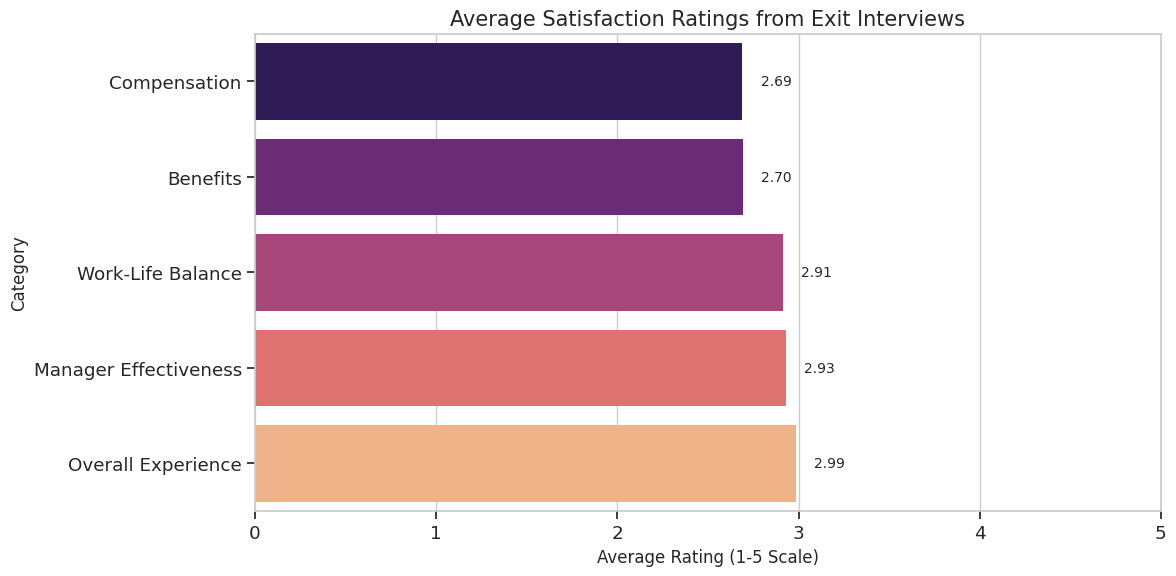

In [12]:
# Satisfaction ratings from exit interviews
satisfaction_cols = ['OverallExperience', 'ManagerEffectiveness', 
                     'CompensationSatisfaction', 'BenefitsSatisfaction', 
                     'WorkLifeBalanceSatisfaction']

# Calculate average satisfaction ratings
avg_satisfaction = exit_interviews_df[satisfaction_cols].mean().sort_values()

# Create more readable labels
label_map = {
    'OverallExperience': 'Overall Experience',
    'ManagerEffectiveness': 'Manager Effectiveness',
    'CompensationSatisfaction': 'Compensation',
    'BenefitsSatisfaction': 'Benefits',
    'WorkLifeBalanceSatisfaction': 'Work-Life Balance'
}

# Plot satisfaction ratings
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=avg_satisfaction.values, y=[label_map[col] for col in avg_satisfaction.index], palette='magma', hue=[label_map[col] for col in avg_satisfaction.index])
plt.title('Average Satisfaction Ratings from Exit Interviews', fontsize=15)
plt.xlabel('Average Rating (1-5 Scale)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.xlim(0, 5)

# Add value labels
for i, v in enumerate(avg_satisfaction.values):
    ax.text(v + 0.1, i, f'{v:.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

### Performance and attrition

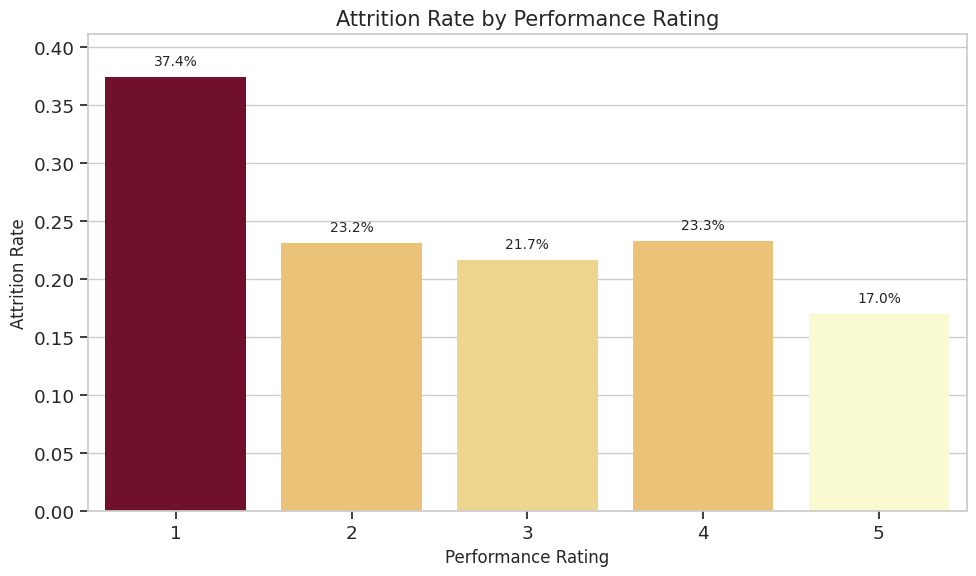

In [14]:
# Analyze the relationship between performance rating and attrition
perf_attrition = employees_df.groupby('PerformanceRating')['Attrition'].mean()

# Plot performance vs attrition
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=perf_attrition.index, y=perf_attrition.values, palette='YlOrRd', hue=perf_attrition.values, legend=False)
plt.title('Attrition Rate by Performance Rating', fontsize=15)
plt.xlabel('Performance Rating', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.ylim(0, max(perf_attrition.values) * 1.1)

# Add value labels
for i, v in enumerate(perf_attrition.values):
    ax.text(i, v + 0.01, f'{v:.1%}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

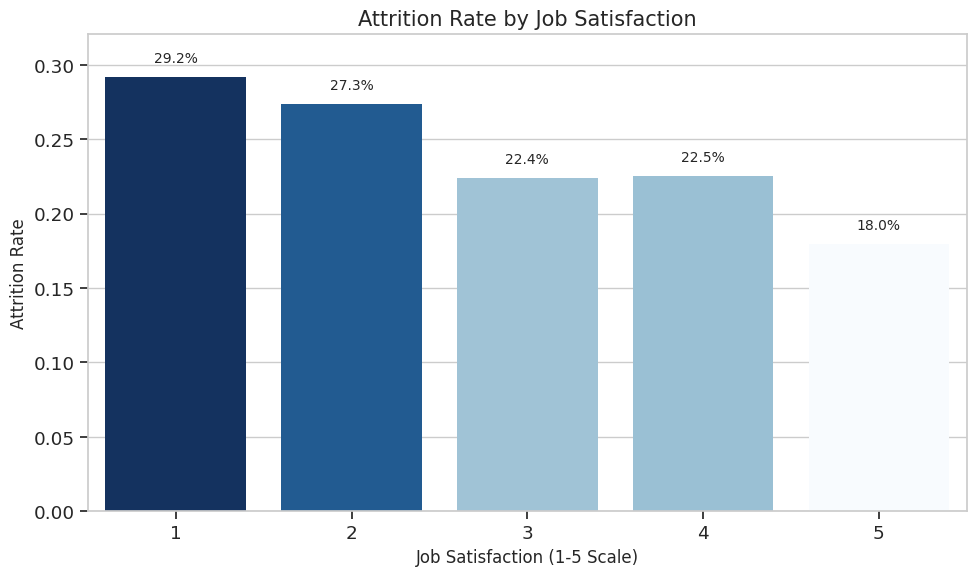

In [17]:
# Analyze job satisfaction and attrition
# Round job satisfaction to nearest integer for grouping
employees_df['JobSatisfactionRounded'] = employees_df['JobSatisfaction'].round().astype(int)
satisfaction_attrition = employees_df.groupby('JobSatisfactionRounded')['Attrition'].mean()

# Plot job satisfaction vs attrition
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=satisfaction_attrition.index, y=satisfaction_attrition.values, palette='Blues', hue=satisfaction_attrition.values, legend=False)
plt.title('Attrition Rate by Job Satisfaction', fontsize=15)
plt.xlabel('Job Satisfaction (1-5 Scale)', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.ylim(0, max(satisfaction_attrition.values) * 1.1)

# Add value labels
for i, v in enumerate(satisfaction_attrition.values):
    ax.text(i, v + 0.01, f'{v:.1%}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

### Compensation analysis

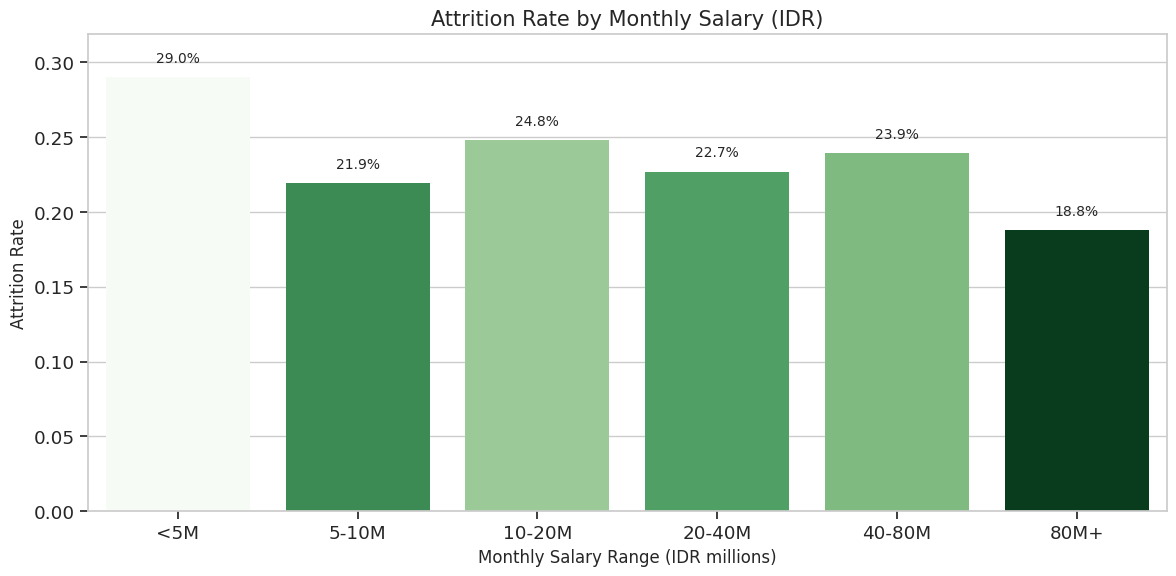

In [20]:
# Create salary bins
employees_df['SalaryBin'] = pd.cut(employees_df['MonthlyIncome'], 
                                  bins=[0, 5, 10, 20, 40, 80, 200],
                                  labels=['<5M', '5-10M', '10-20M', '20-40M', '40-80M', '80M+'])

# Calculate attrition by salary bin
salary_attrition = employees_df.groupby('SalaryBin', observed=False)['Attrition'].mean()

# Plot salary vs attrition
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=salary_attrition.index, y=salary_attrition.values, palette='Greens_r', hue=salary_attrition.values, legend=False)
plt.title('Attrition Rate by Monthly Salary (IDR)', fontsize=15)
plt.xlabel('Monthly Salary Range (IDR millions)', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.ylim(0, max(salary_attrition.values) * 1.1)

# Add value labels
for i, v in enumerate(salary_attrition.values):
    ax.text(i, v + 0.01, f'{v:.1%}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Salary comparison between employees who left vs stayed:
             mean  median  count
Stayed  41.800257  35.950   3000
Left    39.962466  36.555    892


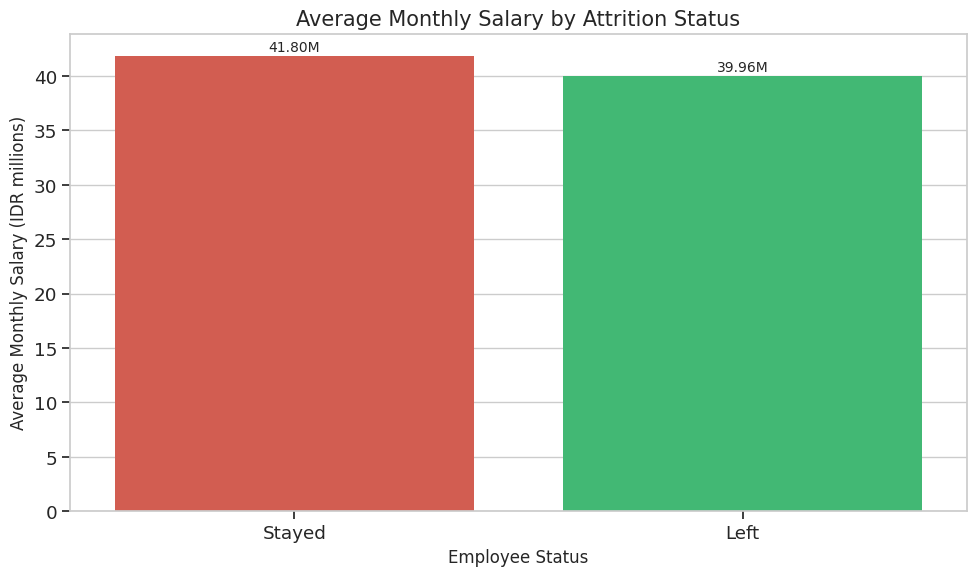

In [22]:
# Compare average salary between those who left and those who stayed
salary_comparison = employees_df.groupby('Attrition')['MonthlyIncome'].agg(['mean', 'median', 'count'])
salary_comparison.index = ['Stayed', 'Left']

# Display results
print("Salary comparison between employees who left vs stayed:")
print(salary_comparison)

# Plot average salary by attrition status
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=salary_comparison.index, y=salary_comparison['mean'], palette=['#2ecc71', '#e74c3c'], hue=salary_comparison['mean'], legend=False)
plt.title('Average Monthly Salary by Attrition Status', fontsize=15)
plt.xlabel('Employee Status', fontsize=12)
plt.ylabel('Average Monthly Salary (IDR millions)', fontsize=12)

# Add value labels
for i, v in enumerate(salary_comparison['mean']):
    ax.text(i, v + 0.5, f'{v:.2f}M', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

### Attrition cost analysis

In [23]:
# Merge employee data with recruitment cost data
employee_cost = pd.merge(employees_df[employees_df['Attrition']], 
                         recruitment_costs_df, 
                         on='JobLevel', 
                         how='left')

# Calculate total attrition costs by job level
job_level_costs = employee_cost.groupby('JobLevel').agg(
    employees_left=('EmployeeID', 'count'),
    avg_recruitment_cost=('TotalRecruitmentCost', 'mean'),
    total_cost=('TotalRecruitmentCost', 'sum')
).sort_values('total_cost', ascending=False)

# Format costs for display
job_level_costs['avg_recruitment_cost'] = job_level_costs['avg_recruitment_cost'].apply(lambda x: f"{x:,.0f} IDR")
job_level_costs['total_cost'] = job_level_costs['total_cost'].apply(lambda x: f"{x:,.0f} IDR")

# Display results
print("Estimated recruitment costs by job level:")
print(job_level_costs)

Estimated recruitment costs by job level:
             employees_left avg_recruitment_cost          total_cost
JobLevel                                                            
Manager                 266      157,137,151 IDR  41,798,482,193 IDR
Director                 77      316,147,578 IDR  24,343,363,481 IDR
Senior                  146      104,584,614 IDR  15,269,353,594 IDR
Mid-Level               173       46,745,856 IDR   8,087,033,005 IDR
Entry Level             207       11,482,541 IDR   2,376,885,954 IDR
Executive                 2      641,768,751 IDR   1,283,537,503 IDR
Junior                   21       24,976,530 IDR     524,507,133 IDR


In [24]:
# Total attrition cost
total_recruitment_cost = employee_cost['TotalRecruitmentCost'].sum()
print(f"Total estimated recruitment cost for all attrition: {total_recruitment_cost:,.0f} IDR")

# Convert to billions for readability
total_cost_billions = total_recruitment_cost / 1_000_000_000
print(f"Total cost in billions: {total_cost_billions:.2f} billion IDR")

# Calculate average cost per departed employee
avg_cost_per_departure = total_recruitment_cost / len(employee_cost)
print(f"Average recruitment cost per departed employee: {avg_cost_per_departure:,.0f} IDR")

Total estimated recruitment cost for all attrition: 93,683,162,863 IDR
Total cost in billions: 93.68 billion IDR
Average recruitment cost per departed employee: 105,025,967 IDR


### Correlation analysis


Correlation with Attrition:
Attrition                  1.000000
DistanceFromHome           0.074002
YearsSinceLastPromotion    0.069539
EnvironmentSatisfaction    0.025645
TrainingTimesLastYear      0.004787
YearsAtCompany            -0.000820
Age                       -0.002162
MonthlyIncome             -0.024865
PerformanceRating         -0.053686
WorkLifeBalance           -0.062995
JobSatisfaction           -0.069492
Name: Attrition, dtype: float64


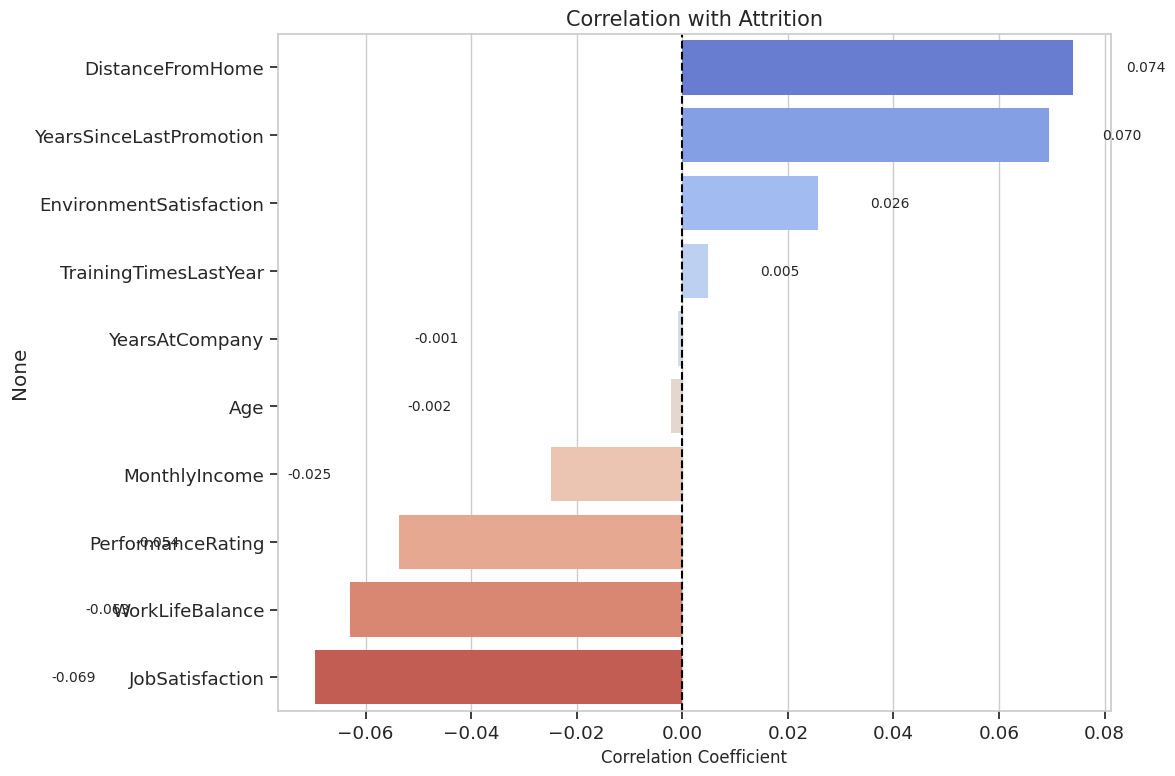

In [25]:
# Select numeric columns for correlation analysis
numeric_cols = ['Age', 'DistanceFromHome', 'YearsAtCompany', 'YearsSinceLastPromotion',
                'JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance',
                'PerformanceRating', 'MonthlyIncome', 'TrainingTimesLastYear', 'Attrition']

# Create correlation matrix
corr_matrix = employees_df[numeric_cols].corr()

# Display correlations with attrition
attrition_corr = corr_matrix['Attrition'].sort_values(ascending=False)
print("Correlation with Attrition:")
print(attrition_corr)

# Plot correlation with attrition
plt.figure(figsize=(12, 8))
attrition_corr = attrition_corr.drop('Attrition')  # Remove self-correlation
ax = sns.barplot(x=attrition_corr.values, y=attrition_corr.index, palette='coolwarm', hue=attrition_corr.index, legend=False)
plt.title('Correlation with Attrition', fontsize=15)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--')

# Add value labels
for i, v in enumerate(attrition_corr.values):
    ax.text(v + 0.01 if v > 0 else v - 0.05, i, f'{v:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

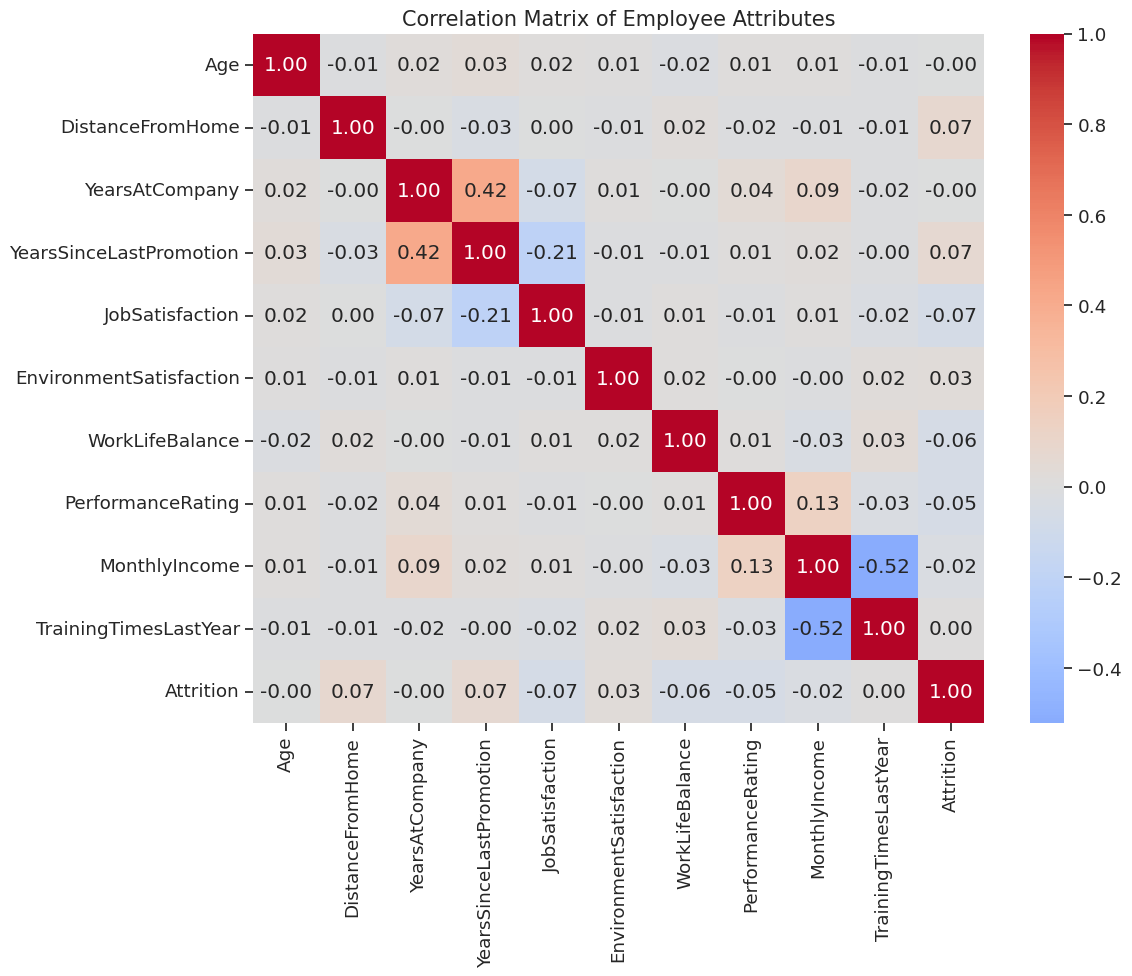

In [26]:
# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Employee Attributes', fontsize=15)
plt.tight_layout()
plt.show()

## Summary

### Key Insights from Data Exploration
#### Attrition Patterns by Demographics
- **Salary Impact**: There's an interesting non-linear relationship with salary both the lowest earners (<5M IDR) and middle-income employees (10-20M IDR) show higher attrition rates than other groups. This suggests different factors may be driving attrition at different compensation levels.
- **Department Variation**: Customer-facing departments (Customer Service at 25.0%, Collections at 24.5%, and Sales at 24.0%) show significantly higher attrition than back-office functions. Executive attrition is notably lower (14.5%), which indicates better retention of leadership.
- **Job Level Dynamics**: The "mid-career crisis" pattern is evident, with Senior (24.6%) and Manager (23.6%) positions showing the highest attrition, while Executive roles have much lower turnover (12.5%). This suggests challenges in retaining middle management talent.
- **Tenure Sweet Spot**: The 2-3 year tenure bracket shows the highest attrition (25.5%), which aligns with the time when employees often reassess their career trajectory. The lower rate for <1 year employees suggests the onboarding experience may be relatively positive.

#### Root Causes
- **Exit Reasons**: Compensation (215 employees), career advancement (167), and work-life balance (166) are overwhelmingly the top reasons for leaving. This creates clear focus areas for intervention strategies.
- **Correlation Analysis**: The surprisingly weak correlations (all below 0.08) suggest attrition is influenced by multiple factors rather than single predictors. This complexity will require sophisticated modeling techniques.

#### Financial Impact
- The total attrition cost of 93.68 billion IDR (~$6M USD) represents a significant business impact
Manager-level attrition creates the highest total cost burden (41.8 billion IDR)
- The average cost of 105 million IDR per departure (~$7,000 USD) provides a clear business case for retention initiatives


### Key Recommendations Based on Data
From the initial exploration, I recommend focusing on these strategic interventions:
1. **Compensation review** for employees in the <5M and 10-20M salary ranges, where attrition is highest
2. **Career path development** for employees reaching the 2-3 year tenure mark, who show the highest likelihood of departure
3. **Work-life balance initiatives** targeting Customer Service, Collections, and Sales departments
4. **Retention bonuses** for Senior and Manager level employees who are approaching 2 years without promotion
5 **Management training** focused on the departments showing highest attrition rates, as manager effectiveness correlates with retention